In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Smartphone_cleaned_v2.csv")

In [3]:
df.head()

,Brand_name,Model,Price,Rating,Has_5G,Has_NFC,Has_IR_Blaster,Processor,Processor_brand,num_cores,...,Fast_charging(W),Screen_size(inches),Resolution(px),Refresh_rate(Hz),Num_rear_cameras,Num_front_cameras,Primary_rear_camera(MP),Primary_front_camera(MP),OS,Extended_memory
0,realme,Realme P4 Pro 5G,24999,73,True,False,True,Snapdragon 7 Gen 4,snapdragon,Octa Core,...,80,6.80,1280 x 2800,144.0,2,1.0,50,50.0,Android,0
1,realme,Realme P4 5G,18499,77,True,False,True,Dimensity 7400 Ultra,mediatek,Octa Core,...,80,6.77,1080 x 2392,144.0,2,1.0,50,16.0,Android,0
2,vivo,Vivo V60 5G,36999,86,True,True,True,Snapdragon 7 Gen4,snapdragon,Octa Core,...,90,6.77,1080 x 2392,120.0,3,1.0,50,50.0,Android,0
3,xiaomi,Xiaomi Redmi 15 5G,14999,78,True,False,True,Snapdragon 6s Gen3,snapdragon,Octa Core,...,33,6.90,1080 x 2340,144.0,2,1.0,50,8.0,Android,1 TB
4,motorola,Motorola Moto G86 Power 5G,18999,83,True,False,False,Dimensity 7400,mediatek,Octa Core,...,33,6.70,1220 x 2712,120.0,2,1.0,50,32.0,Android,1 TB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand_name                1014 non-null   object 
 1   Model                     1014 non-null   object 
 2   Price                     1014 non-null   int64  
 3   Rating                    1014 non-null   int64  
 4   Has_5G                    1014 non-null   bool   
 5   Has_NFC                   1014 non-null   bool   
 6   Has_IR_Blaster            1014 non-null   bool   
 7   Processor                 1014 non-null   object 
 8   Processor_brand           1014 non-null   object 
 9   num_cores                 1014 non-null   object 
 10  Processor_speed(GHz)      982 non-null    float64
 11  Ram_capacity              1014 non-null   float64
 12  Internal_storage          1014 non-null   int64  
 13  Battery_capacity(mAh)     1014 non-null   float64
 14  Fast_cha

In [125]:
numerical_columns = list(df.select_dtypes(include='number').columns)
categorical_columns = list(df.select_dtypes(include='object').columns)
categorical_columns.remove("Model")
categorical_columns.remove("Processor")
categorical_columns.remove("Resolution(px)")

In [126]:
numerical_columns

['Price',
 'Rating',
 'Processor_speed(GHz)',
 'Ram_capacity',
 'Internal_storage',
 'Battery_capacity(mAh)',
 'Fast_charging(W)',
 'Screen_size(inches)',
 'Refresh_rate(Hz)',
 'Num_rear_cameras',
 'Num_front_cameras',
 'Primary_rear_camera(MP)',
 'Primary_front_camera(MP)',
 'Extended_memory']

In [127]:
categorical_columns

['Brand_name',
 'Has_5G',
 'Has_NFC',
 'Has_IR_Blaster',
 'Processor_brand',
 'num_cores',
 'OS']

In [128]:
df[numerical_columns].describe()

,Price,Rating,Processor_speed(GHz),Ram_capacity,Internal_storage,Battery_capacity(mAh),Fast_charging(W),Screen_size(inches),Refresh_rate(Hz),Num_rear_cameras,Num_front_cameras,Primary_rear_camera(MP),Primary_front_camera(MP),Extended_memory
count,1014.000000,1014.000000,982.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,27879.596647,78.704142,2.586538,7.788955,200.284024,5216.177515,43.427022,6.676292,108.976331,2.372781,1.021696,52.569231,18.433728,559.084813
std,27885.489173,7.876593,0.551581,3.126304,142.670781,687.948891,30.898587,0.239612,22.541295,0.643203,0.145762,27.965436,13.608931,691.067920
min,2750.000000,47.000000,1.250000,2.000000,16.000000,2000.000000,-1.000000,3.000000,60.000000,1.000000,1.000000,8.000000,5.000000,0.000000
25%,11891.500000,74.000000,2.200000,6.000000,128.000000,5000.000000,18.000000,6.600000,90.000000,2.000000,1.000000,50.000000,8.000000,0.000000
50%,18999.000000,80.000000,2.400000,8.000000,128.000000,5000.000000,33.000000,6.700000,120.000000,2.000000,1.000000,50.000000,13.000000,0.000000
75%,30996.750000,84.000000,2.850000,8.000000,256.000000,5500.000000,67.000000,6.770000,120.000000,3.000000,1.000000,50.000000,32.000000,1024.000000
max,216999.000000,97.000000,4.470000,24.000000,1024.000000,7550.000000,150.000000,8.030000,165.000000,4.000000,2.000000,200.000000,50.000000,2048.000000


In [129]:
df[categorical_columns].describe()

,Brand_name,Has_5G,Has_NFC,Has_IR_Blaster,Processor_brand,num_cores,OS
count,1014,1014,1014,1014,1014,1014,1014
unique,24,2,2,2,8,5,2
top,realme,Yes,No,No,mediatek,Octa Core,Android
freq,168,821,626,759,500,963,982


Text(0.5, 0, 'Extended_memory')

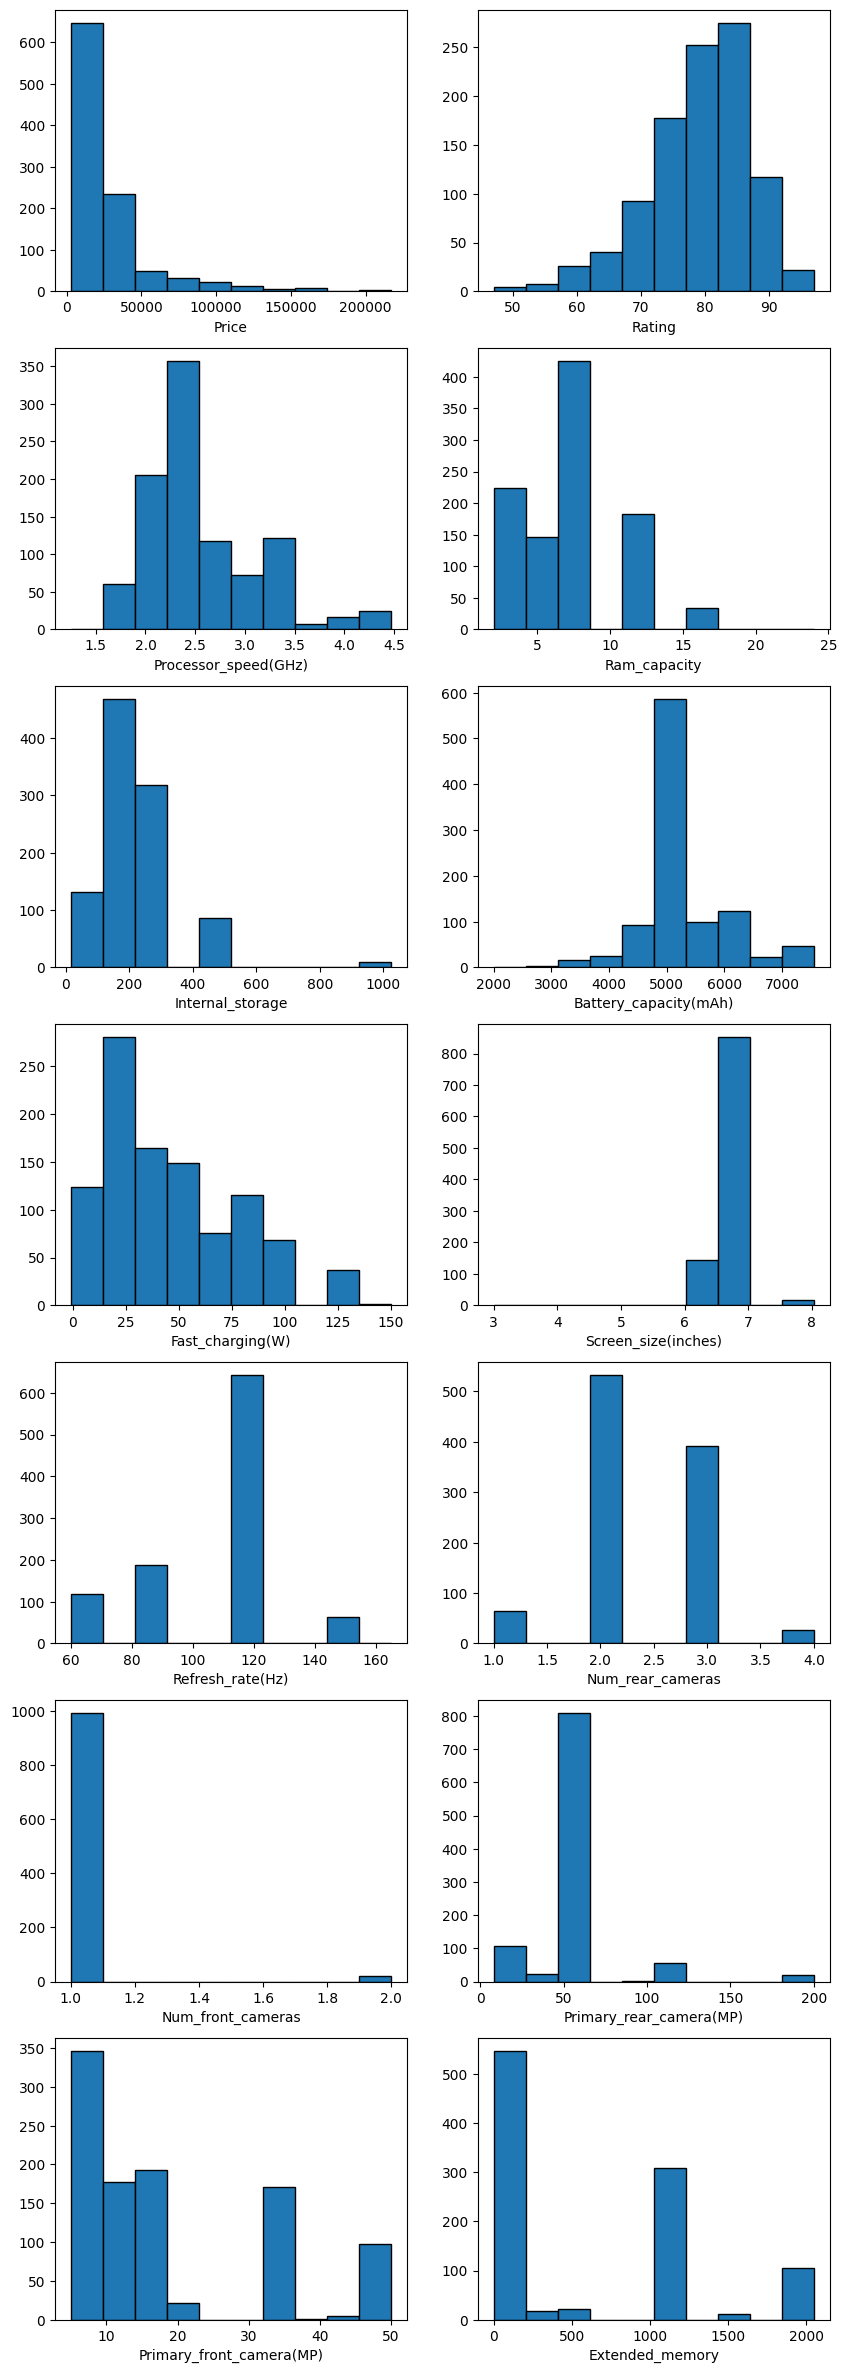

In [113]:
fig, ax = plt.subplots(nrows=7,ncols=2,figsize=(10,30))

ax[0,0].hist(df['Price'],edgecolor='k')
ax[0,0].set_xlabel("Price")

ax[0,1].hist(df['Rating'],edgecolor='k')
ax[0,1].set_xlabel("Rating")

ax[1,0].hist(df['Processor_speed(GHz)'],edgecolor='k')
ax[1,0].set_xlabel("Processor_speed(GHz)")

ax[1,1].hist(df['Ram_capacity'],edgecolor='k')
ax[1,1].set_xlabel("Ram_capacity")

ax[2,0].hist(df['Internal_storage'],edgecolor='k')
ax[2,0].set_xlabel("Internal_storage")

ax[2,1].hist(df['Battery_capacity(mAh)'],edgecolor='k')
ax[2,1].set_xlabel("Battery_capacity(mAh)")

ax[3,0].hist(df['Fast_charging(W)'],edgecolor='k')
ax[3,0].set_xlabel("Fast_charging(W)")

ax[3,1].hist(df['Screen_size(inches)'],edgecolor='k')
ax[3,1].set_xlabel("Screen_size(inches)")

ax[4,0].hist(df['Refresh_rate(Hz)'],edgecolor='k')
ax[4,0].set_xlabel("Refresh_rate(Hz)")

ax[4,1].hist(df['Num_rear_cameras'],edgecolor='k')
ax[4,1].set_xlabel("Num_rear_cameras")

ax[5,0].hist(df['Num_front_cameras'],edgecolor='k')
ax[5,0].set_xlabel("Num_front_cameras")

ax[5,1].hist(df['Primary_rear_camera(MP)'],edgecolor='k')
ax[5,1].set_xlabel("Primary_rear_camera(MP)")

ax[6,0].hist(df['Primary_front_camera(MP)'],edgecolor='k')
ax[6,0].set_xlabel("Primary_front_camera(MP)")

ax[6,1].hist(df['Extended_memory'],edgecolor='k')
ax[6,1].set_xlabel("Extended_memory")



In [ ]:
plt.bar(df)

Text(0.5, 0, 'Extended_memory')

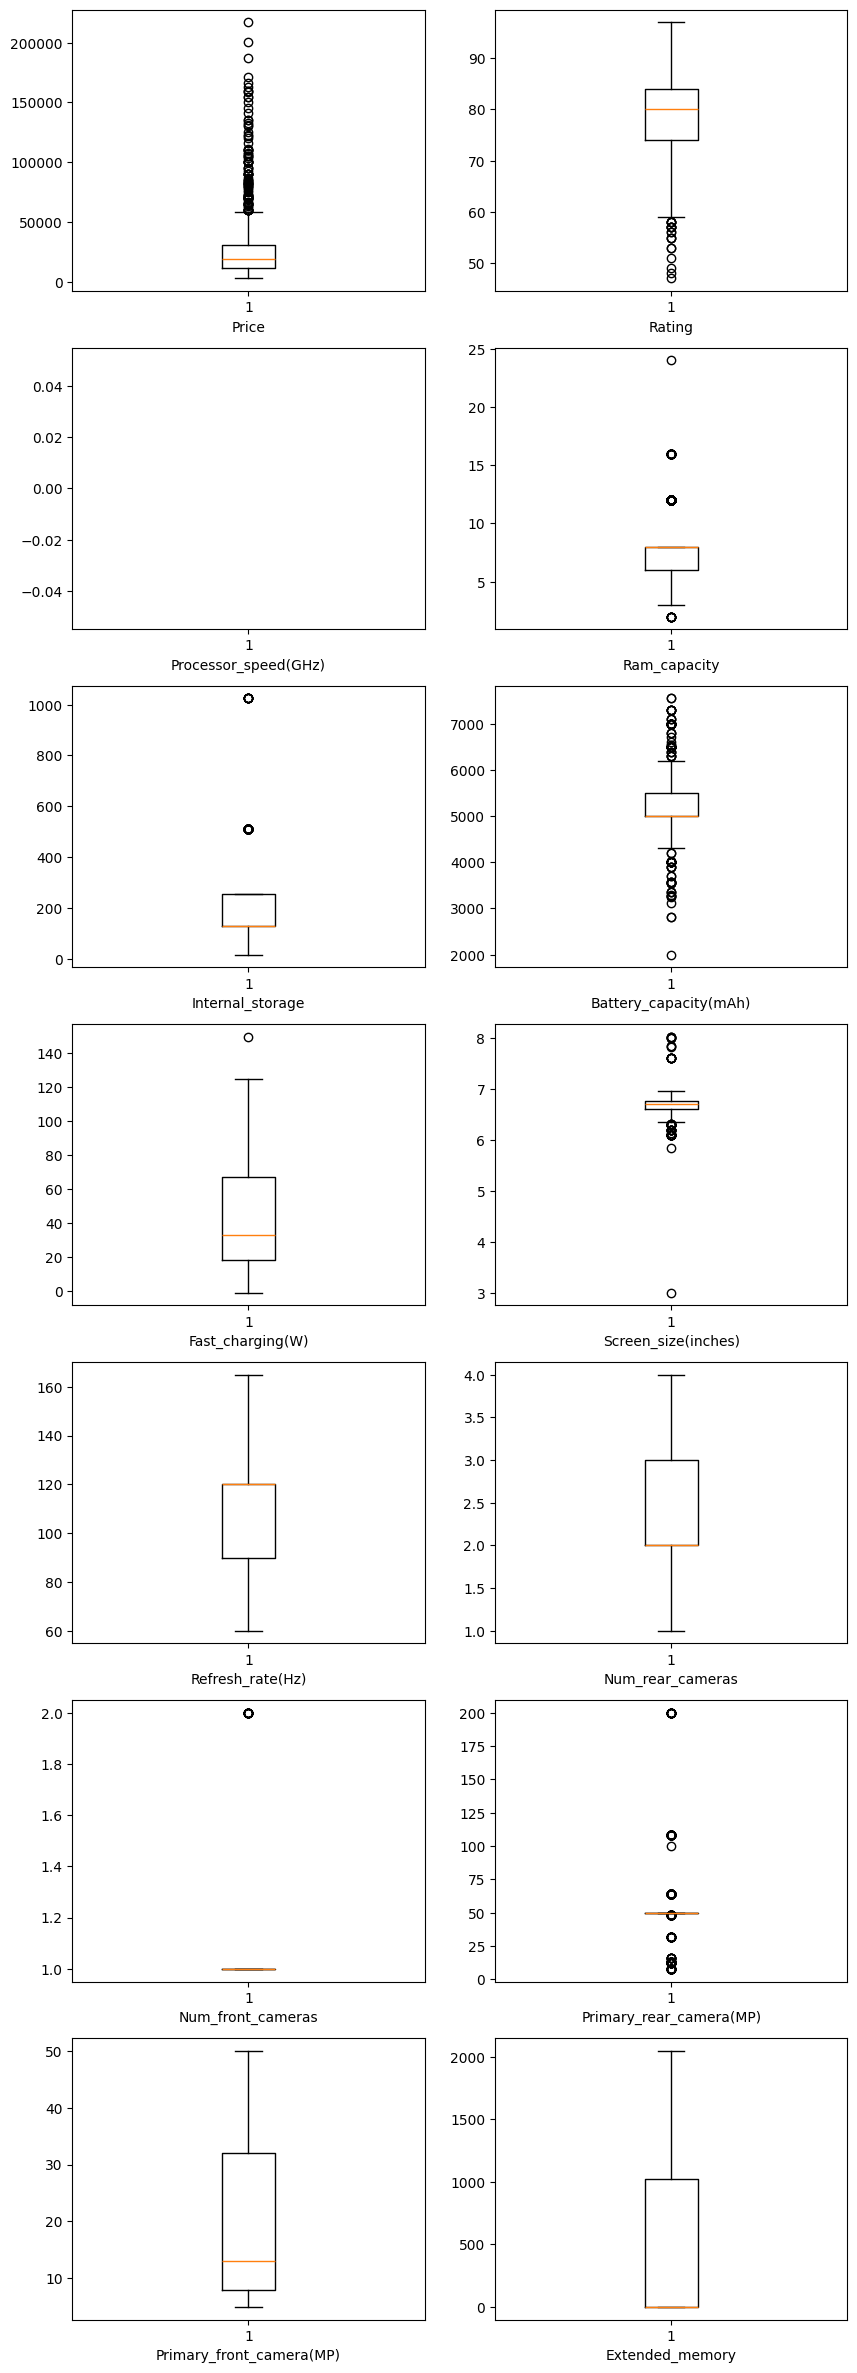

In [115]:
fig, ax = plt.subplots(nrows=7,ncols=2,figsize=(10,30))

ax[0,0].boxplot(df['Price'])
ax[0,0].set_xlabel("Price")

ax[0,1].boxplot(df['Rating'])
ax[0,1].set_xlabel("Rating")

ax[1,0].boxplot(df['Processor_speed(GHz)'])
ax[1,0].set_xlabel("Processor_speed(GHz)")

ax[1,1].boxplot(df['Ram_capacity'])
ax[1,1].set_xlabel("Ram_capacity")

ax[2,0].boxplot(df['Internal_storage'])
ax[2,0].set_xlabel("Internal_storage")

ax[2,1].boxplot(df['Battery_capacity(mAh)'])
ax[2,1].set_xlabel("Battery_capacity(mAh)")

ax[3,0].boxplot(df['Fast_charging(W)'])
ax[3,0].set_xlabel("Fast_charging(W)")

ax[3,1].boxplot(df['Screen_size(inches)'])
ax[3,1].set_xlabel("Screen_size(inches)")

ax[4,0].boxplot(df['Refresh_rate(Hz)'])
ax[4,0].set_xlabel("Refresh_rate(Hz)")

ax[4,1].boxplot(df['Num_rear_cameras'])
ax[4,1].set_xlabel("Num_rear_cameras")

ax[5,0].boxplot(df['Num_front_cameras'])
ax[5,0].set_xlabel("Num_front_cameras")

ax[5,1].boxplot(df['Primary_rear_camera(MP)'])
ax[5,1].set_xlabel("Primary_rear_camera(MP)")

ax[6,0].boxplot(df['Primary_front_camera(MP)'])
ax[6,0].set_xlabel("Primary_front_camera(MP)")

ax[6,1].boxplot(df['Extended_memory'])
ax[6,1].set_xlabel("Extended_memory")



In [116]:
categorical_columns

['Brand_name',
 'Has_5G',
 'Has_NFC',
 'Has_IR_Blaster',
 'Processor_brand',
 'num_cores',
 'Resolution(px)',
 'OS']

C:\Users\gayat\AppData\Local\Temp\ipykernel_12620\4162434890.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2,0].set_xticklabels(df['Processor_brand'].unique(),rotation="vertical")
C:\Users\gayat\AppData\Local\Temp\ipykernel_12620\4162434890.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2,1].set_xticklabels(df['num_cores'].unique(),rotation="vertical")


Text(0.5, 0, 'OS')

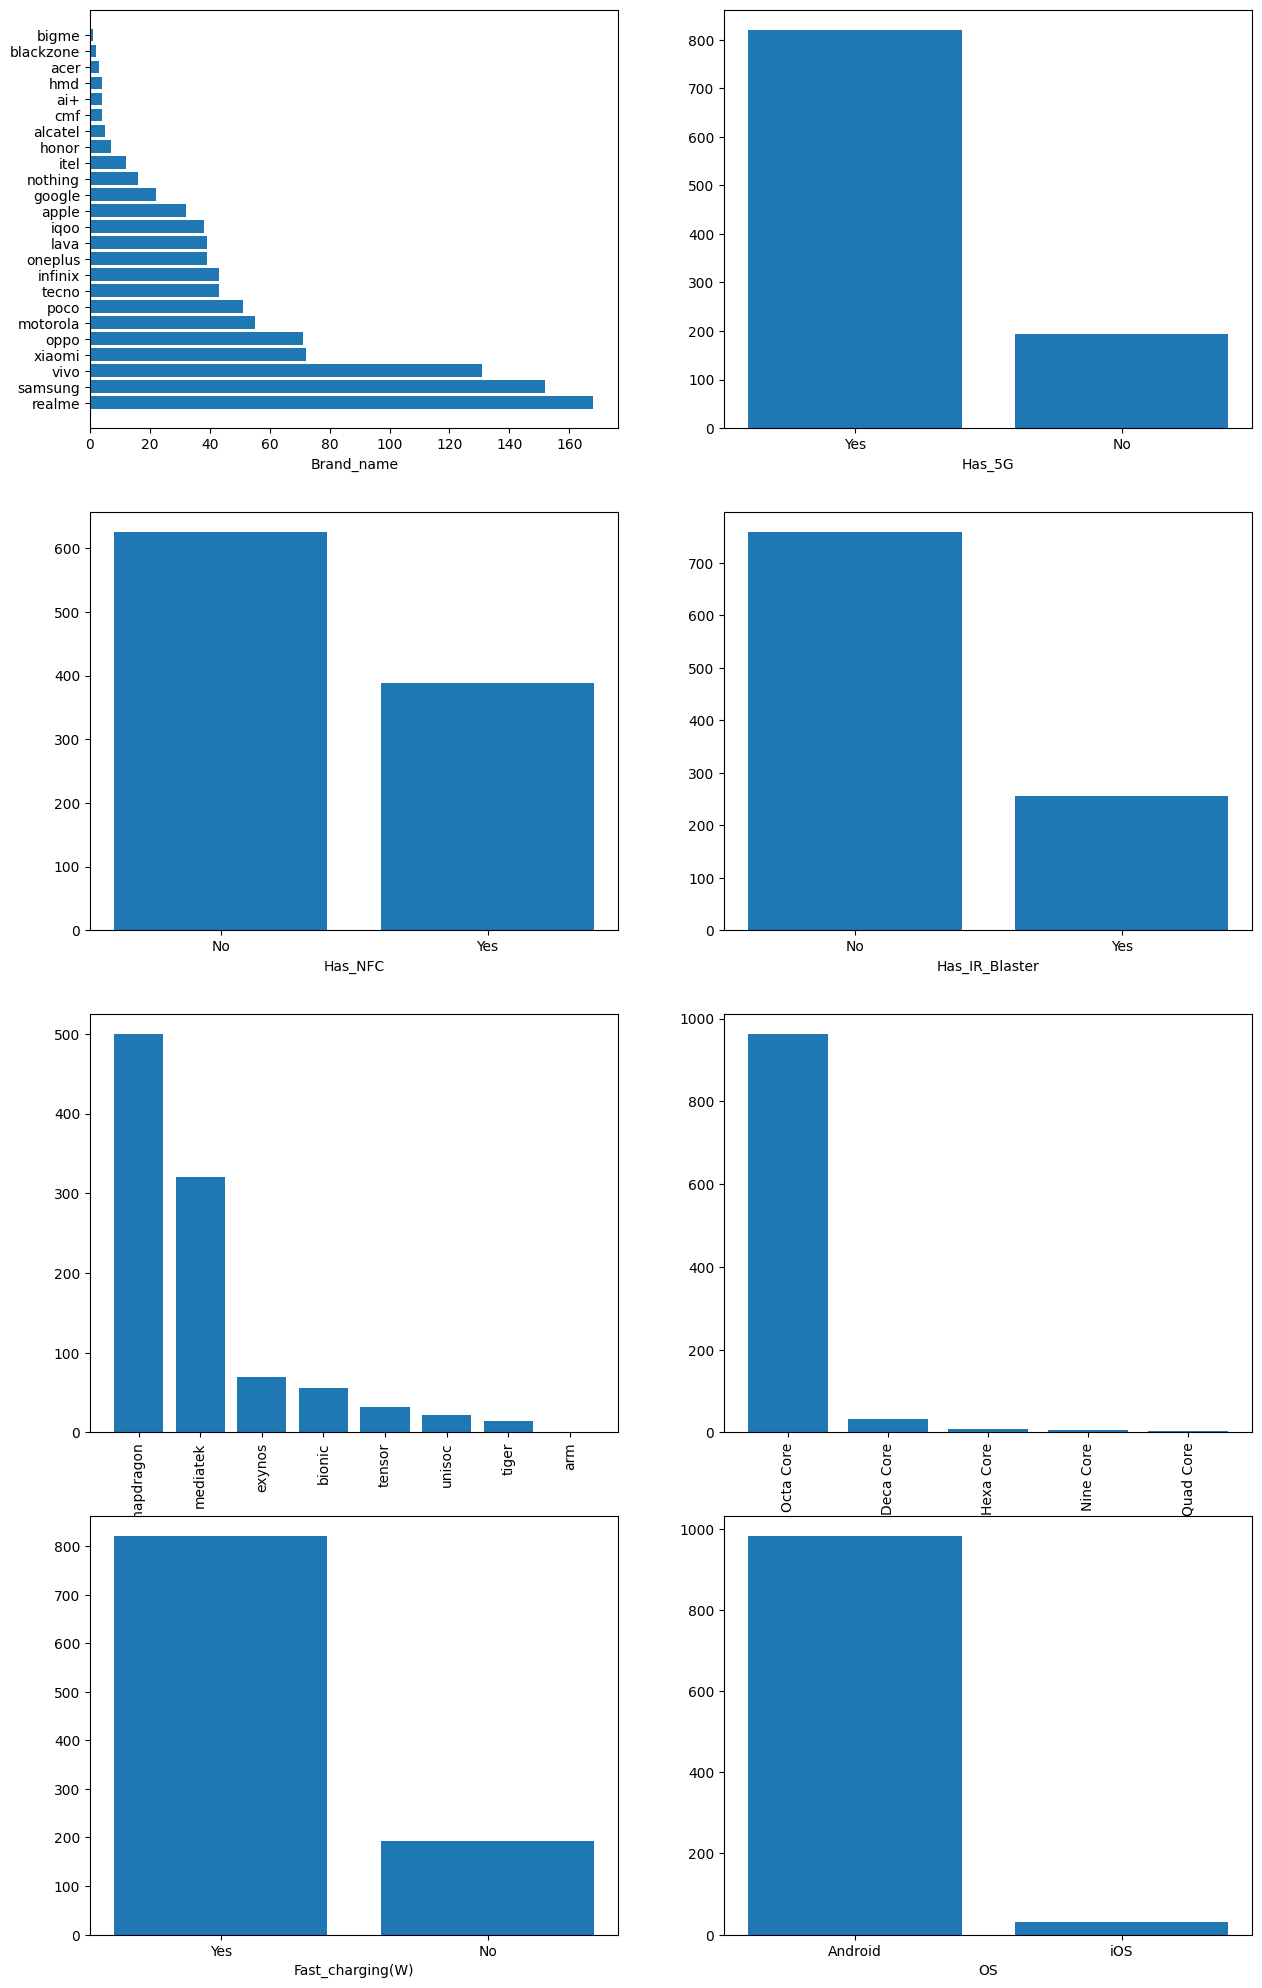

In [150]:
fig, ax = plt.subplots(nrows=4,ncols=2,figsize=(15,25))

ax[0,0].barh(y=df['Brand_name'].value_counts().index, width=df['Brand_name'].value_counts().values)
ax[0,0].set_xlabel("Brand_name")


ax[0,1].bar(x=df['Has_5G'].value_counts().index, height=df['Has_5G'].value_counts().values)
ax[0,1].set_xlabel("Has_5G")

ax[1,0].bar(x=df['Has_NFC'].value_counts().index, height=df['Has_NFC'].value_counts().values)
ax[1,0].set_xlabel("Has_NFC")

ax[1,1].bar(x=df['Has_IR_Blaster'].value_counts().index, height=df['Has_IR_Blaster'].value_counts().values)
ax[1,1].set_xlabel("Has_IR_Blaster")

ax[2,0].bar(x=df['Processor_brand'].value_counts().index, height=df['Processor_brand'].value_counts().values)
ax[2,0].set_xlabel("Processor_brand")
ax[2,0].set_xticklabels(df['Processor_brand'].unique(),rotation="vertical")

ax[2,1].bar(x=df['num_cores'].value_counts().index, height=df['num_cores'].value_counts().values)
ax[2,1].set_xlabel("num_cores")
ax[2,1].set_xticklabels(df['num_cores'].unique(),rotation="vertical")

ax[3,0].bar(x=df['Has_5G'].value_counts().index, height=df['Has_5G'].value_counts().values)
ax[3,0].set_xlabel("Fast_charging(W)")

ax[3,1].bar(x=df['OS'].value_counts().index, height=df['OS'].value_counts().values)
ax[3,1].set_xlabel("OS")





Text(0.5, 1.0, 'OS')

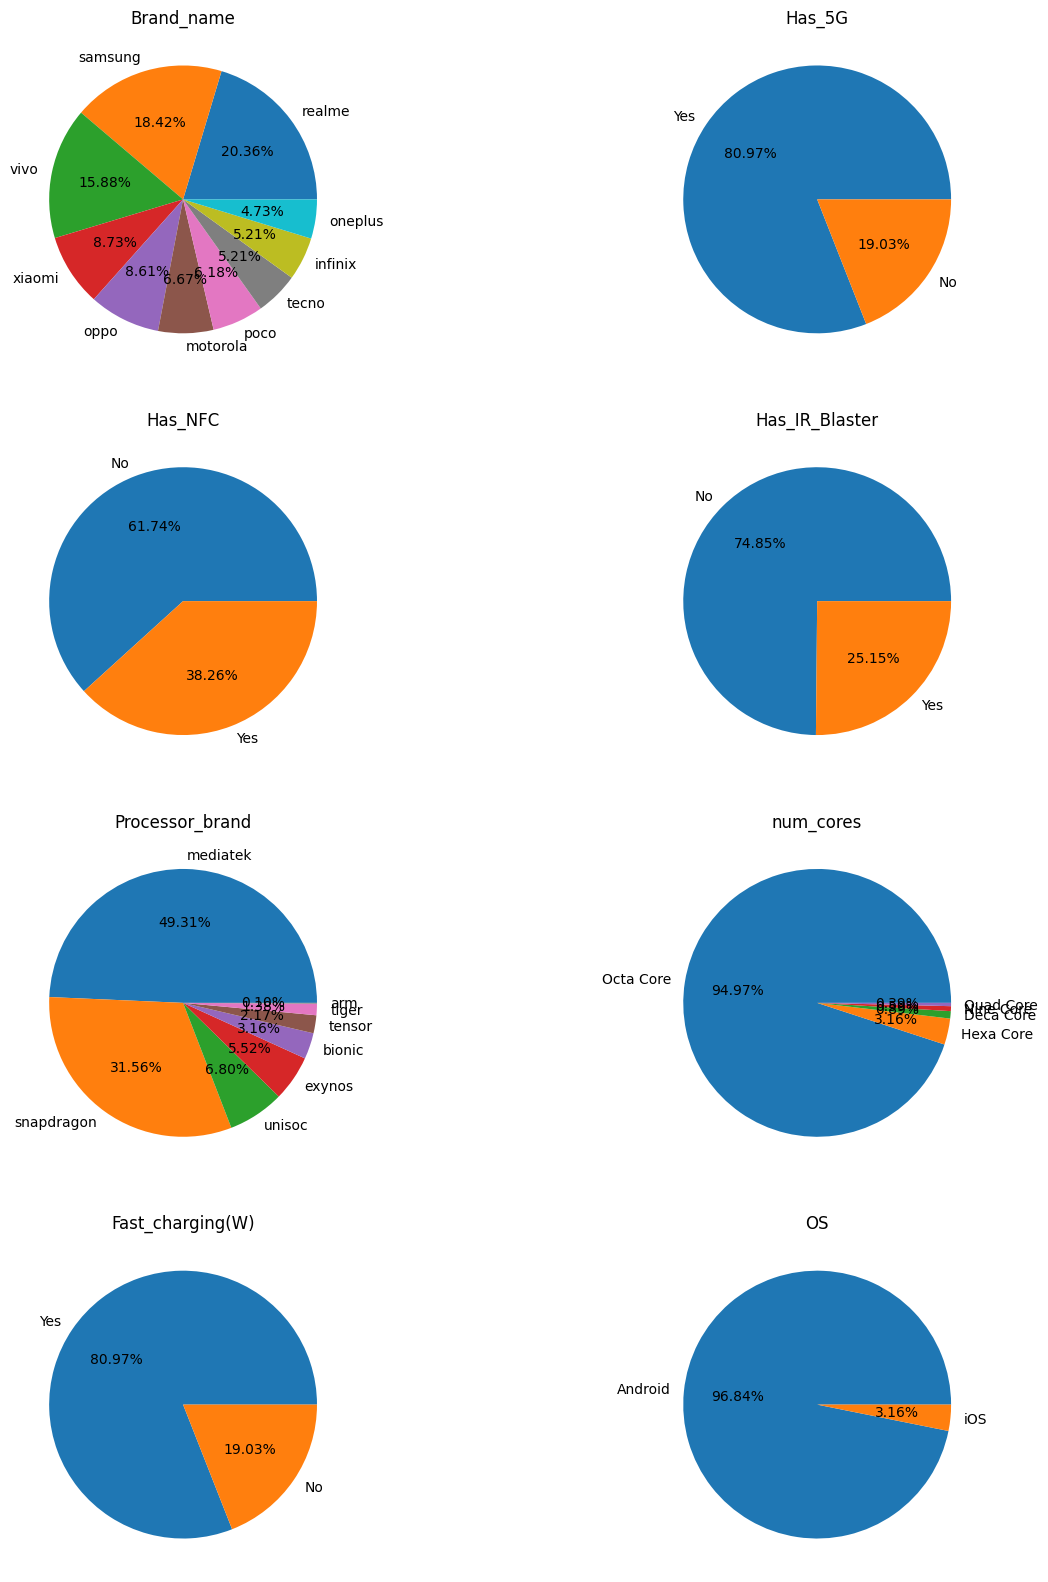

In [148]:
fig, ax = plt.subplots(nrows=4,ncols=2,figsize=(15,20))

ax[0,0].pie(df['Brand_name'].value_counts().head(10).values,labels=df['Brand_name'].value_counts().head(10).index,autopct='%0.2f%%')
ax[0,0].set_title("Brand_name")


ax[0,1].pie(df['Has_5G'].value_counts().values, labels=df['Has_5G'].value_counts().index,autopct='%0.2f%%')
ax[0,1].set_title("Has_5G")

ax[1,0].pie(df['Has_NFC'].value_counts().values, labels=df['Has_NFC'].value_counts().index,autopct='%0.2f%%')
ax[1,0].set_title("Has_NFC")

ax[1,1].pie(df['Has_IR_Blaster'].value_counts().values, labels=df['Has_IR_Blaster'].value_counts().index,autopct='%0.2f%%')
ax[1,1].set_title("Has_IR_Blaster")

ax[2,0].pie(df['Processor_brand'].value_counts().values, labels=df['Processor_brand'].value_counts().index,autopct='%0.2f%%')
ax[2,0].set_title("Processor_brand")

ax[2,1].pie(df['num_cores'].value_counts().values, labels=df['num_cores'].value_counts().index,autopct='%0.2f%%')
ax[2,1].set_title("num_cores")

ax[3,0].pie(df['Has_5G'].value_counts().values, labels=df['Has_5G'].value_counts().index,autopct='%0.2f%%')
ax[3,0].set_title("Fast_charging(W)")

ax[3,1].pie(df['OS'].value_counts().values, labels=df['OS'].value_counts().index,autopct='%0.2f%%')
ax[3,1].set_title("OS")


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand_name                1014 non-null   object 
 1   Model                     1014 non-null   object 
 2   Price                     1014 non-null   int64  
 3   Rating                    1014 non-null   int64  
 4   Has_5G                    1014 non-null   object 
 5   Has_NFC                   1014 non-null   object 
 6   Has_IR_Blaster            1014 non-null   object 
 7   Processor                 1014 non-null   object 
 8   Processor_brand           1014 non-null   object 
 9   num_cores                 1014 non-null   object 
 10  Processor_speed(GHz)      982 non-null    float64
 11  Ram_capacity              1014 non-null   float64
 12  Internal_storage          1014 non-null   int64  
 13  Battery_capacity(mAh)     1014 non-null   float64
 14  Fast_cha

In [151]:
numerical_columns

['Price',
 'Rating',
 'Processor_speed(GHz)',
 'Ram_capacity',
 'Internal_storage',
 'Battery_capacity(mAh)',
 'Fast_charging(W)',
 'Screen_size(inches)',
 'Refresh_rate(Hz)',
 'Num_rear_cameras',
 'Num_front_cameras',
 'Primary_rear_camera(MP)',
 'Primary_front_camera(MP)',
 'Extended_memory']

In [152]:
df[numerical_columns].corr()

,Price,Rating,Processor_speed(GHz),Ram_capacity,Internal_storage,Battery_capacity(mAh),Fast_charging(W),Screen_size(inches),Refresh_rate(Hz),Num_rear_cameras,Num_front_cameras,Primary_rear_camera(MP),Primary_front_camera(MP),Extended_memory
Price,1.000000,0.637260,0.776241,0.583341,0.723283,-0.206746,0.148753,0.276362,0.205177,0.348456,0.457154,0.307766,0.214982,-0.399547
Rating,0.637260,1.000000,0.721335,0.811060,0.659517,0.039648,0.557814,0.275275,0.579955,0.549059,0.234309,0.487671,0.579255,-0.341324
Processor_speed(GHz),0.776241,0.721335,1.000000,0.622664,0.612685,-0.056191,0.371518,0.125965,0.317980,0.335926,0.217379,0.256185,0.311104,-0.467071
Ram_capacity,0.583341,0.811060,0.622664,1.000000,0.700078,0.146448,0.609595,0.268827,0.530165,0.423554,0.226687,0.344701,0.541914,-0.416667
Internal_storage,0.723283,0.659517,0.612685,0.700078,1.000000,0.018560,0.380029,0.288761,0.337364,0.342049,0.349836,0.295606,0.382591,-0.363847
Battery_capacity(mAh),-0.206746,0.039648,-0.056191,0.146448,0.018560,1.000000,0.446028,0.310244,0.319971,-0.118496,-0.107806,-0.019625,0.214305,-0.045005
Fast_charging(W),0.148753,0.557814,0.371518,0.609595,0.380029,0.446028,1.000000,0.246586,0.563876,0.271432,0.002763,0.200621,0.612211,-0.364711
Screen_size(inches),0.276362,0.275275,0.125965,0.268827,0.288761,0.310244,0.246586,1.000000,0.332002,0.100957,0.523783,0.233936,0.124734,-0.035374
Refresh_rate(Hz),0.205177,0.579955,0.317980,0.530165,0.337364,0.319971,0.563876,0.332002,1.000000,0.192206,0.072865,0.307891,0.438680,-0.179720
Num_rear_cameras,0.348456,0.549059,0.335926,0.423554,0.342049,-0.118496,0.271432,0.100957,0.192206,1.000000,0.155821,0.362424,0.336249,-0.205825
